## Che ku Rusna Aida Binti Che Ku Ramli

### Import Libraries 

In [1]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
from deep_translator import GoogleTranslator
import json

#Visualization purpose
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#Machine Learning Algorithms
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Authorization with API and Access Token Key

In [2]:
#Part 1: Authorization and Search tweets

consumer_key = ''
consumer_key_secret = ''
access_token = ''
access_token_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

### Question 1 : Search word 'deltacron' with tweepy

In [3]:
#Part 2: Defining Search keyword and number of tweets and searching tweets
query = 'deltacron'
max_tweets = 2000
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q=query).items(max_tweets)]

###### I choose the word 'deltacron' with the maximum tweets is 2000
###### P.S: I did not get the tweets with the specific range of time as stated in the assessment
###### I extract the real time tweets

### Sentiment Analysis Report

In [4]:
# finding sentiment analysis (positive and negative words)
pos = 1
neg = 0
sentiment=[]
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>=0:
       pos = pos+1
       react=1
    elif analysis.sentiment[0]<0:
       neg = neg+1
       react=0
    sentiment.append(react)   

print("Total Positive = ", pos)
print("Total Negative = ", neg)

Total Positive =  1887
Total Negative =  114


###### 1887 of 2000 tweets that have been extracted is the positive reaction
###### The rest of the tweets is negative reaction (may contain word like 'never', 'death' etc)

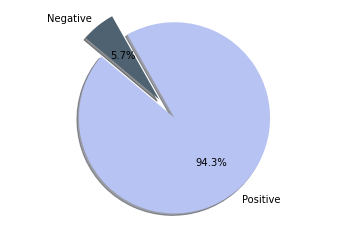

In [5]:
# plotting sentiments
labels = 'Positive', 'Negative'
sizes = [pos, neg]
colors = ['#B7C3F3', '#4F6272']
explode = (0, 0.25)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Creating Dataframe of Tweets

In [6]:
#Part 3: Creating Dataframe of Tweets

# cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        text = each_dictionary['text']
        retweet_count = each_dictionary['retweet_count']
        date_time = each_dictionary['created_at']
        my_demo_list.append({'text': str(text),
                             'retweet_count': int(retweet_count),
                             'date_time': date_time,
                            })
        
        tweetdata = pd.DataFrame(my_demo_list, columns = 
                                  ['text', 
                                   'retweet_count', 
                                   'date_time'])
    
# writing tweet dataset ti csv file for future reference
tweetdata.to_csv('tweetdata.csv')

In [7]:
tweetdata.head(11)

,text,retweet_count,date_time
0,Research show that ‘Deltacron’ Covid variant m...,0,Fri Jan 28 08:14:16 +0000 2022
1,デルタミクロン現る！デルタの毒性とオミクロンの感染力？Twitter→仮面ライダーの悪の組織...,0,Fri Jan 28 08:11:00 +0000 2022
2,"you've seen deltacron, you've seen flurona, no...",0,Fri Jan 28 08:06:38 +0000 2022
3,RT @RaffaelleMiller: #Omicron #DeltaVariant an...,4,Fri Jan 28 07:50:37 +0000 2022
4,Deltacron - omicron and delta combination dete...,0,Fri Jan 28 07:40:30 +0000 2022
5,RT @Focus_it: La notizia della variante #Delta...,4,Fri Jan 28 07:31:36 +0000 2022
6,@DiegoFusaro E la Deltacron dove è andata a fi...,0,Fri Jan 28 07:22:53 +0000 2022
7,@DiegoFusaro Ma di Deltacron si sa più niente?,0,Fri Jan 28 06:54:55 +0000 2022
8,"RT @PakiStudents: Cannot normal again, after o...",2,Fri Jan 28 06:50:43 +0000 2022
9,デルタ変異株(DeltaCron)？デルミクロン(Delmicron)？\nどっちかな？,0,Fri Jan 28 06:39:21 +0000 2022


### Question 2: EDA

In [9]:
#Part 4: Text pre-processing

# remove @ pattern
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

# translate non english to english language
def translation(tweet):
    return GoogleTranslator(source='auto', target='en').translate(tweet)

cleantweet = []
for i in range(0, 2000):
    tweet = np.vectorize(remove_pattern)(tweetdata['text'][i], "@[\w]*")
    tweet = translation(tweetdata['text'][i])
    tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet)
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    cleantweet.append(tweet)
    
# add cleantweet as a new column in tweetdata.csv
tweetdata['cleantweet']=cleantweet

In [10]:
tweetdata['cleantweet']

0       research show deltacron covid variant may resu...
1       delta micron appear delta toxic omicron infect...
2       seen deltacron seen flurona feast eye son omic...
3       raffaellemil omicron deltavari deltacron enjoy...
4       deltacron omicron delta combin detect brush la...
                              ...                        
1995       deltacron know power granni chocol legal coffe
1996    enemyinast greec amp cypru deltacron updat dea...
1997    enemyinast greec amp cypru deltacron updat dea...
1998    chaknorris93 mask protect alpha delta delta pl...
1999    el dmn11 2021 1 vaccin 2 vaccin 2022 booster o...
Name: cleantweet, Length: 2000, dtype: object

In [11]:
# adding new column 'sentiment' to identify positive and negative reaction
tweetdata['sentiment']=sentiment
tweetdata.head()

,text,retweet_count,date_time,cleantweet,sentiment
0,Research show that ‘Deltacron’ Covid variant m...,0,Fri Jan 28 08:14:16 +0000 2022,research show deltacron covid variant may resu...,0
1,デルタミクロン現る！デルタの毒性とオミクロンの感染力？Twitter→仮面ライダーの悪の組織...,0,Fri Jan 28 08:11:00 +0000 2022,delta micron appear delta toxic omicron infect...,1
2,"you've seen deltacron, you've seen flurona, no...",0,Fri Jan 28 08:06:38 +0000 2022,seen deltacron seen flurona feast eye son omic...,1
3,RT @RaffaelleMiller: #Omicron #DeltaVariant an...,4,Fri Jan 28 07:50:37 +0000 2022,raffaellemil omicron deltavari deltacron enjoy...,1
4,Deltacron - omicron and delta combination dete...,0,Fri Jan 28 07:40:30 +0000 2022,deltacron omicron delta combin detect brush la...,1


### WordCloud Visualization

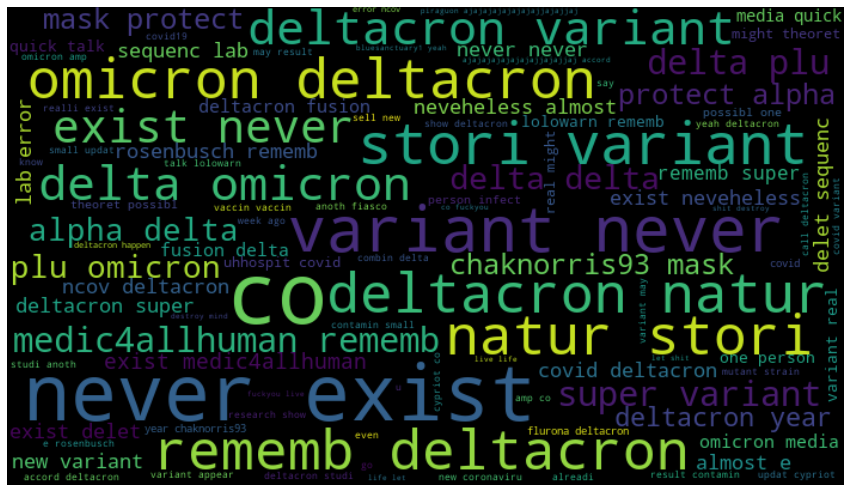

In [12]:
#Part 5: WordCloud Visualization
word = ' '.join([text for text in tweetdata['cleantweet']])
wordcloud = WordCloud(width=700, height=400, max_font_size=70, max_words=100, background_color="black").generate(word)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

###### The word 'delta' and 'omicron' appear the most for the tweet 'deltacron' since deltacron is said to be the 'super variant' which is a combination of delta and omicron
###### The word 'never exist' is also appear on the above visual. As WHO said, delta and omicron did not form the super variant and basically deltacron is not exist. It seems to be a topic in twitter for the tweet 'deltacron'

### Question 3: ML Algorithm: Use Gaussian Naive Bayes

In [13]:
#Part 6: Build the model
# feature extraction
# TfidfVectorizer is used to vectorize text documents
# transforms sentences into array of numbers

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweetdata['cleantweet'])

In [14]:
# splitting the data set into training set and test set
X = tfidf
y = tweetdata['sentiment']#.apply(lambda x: 0 if x=='neg' else 1)
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size = 0.25, random_state = 0)

[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

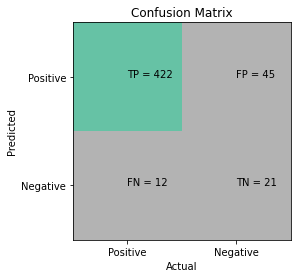

In [15]:

# to evaluate the performance of classification model
def cmatrix(matrix):
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

def naive_model(X_train, X_test, y_train, y_test):
    
    # create GaussianNB classifier object
    classifier = GaussianNB()
    # fit to training model
    classifier.fit(X_train.toarray(), y_train)
    # predictions over test data
    y_pred = classifier.predict(X_test.toarray())
    
    print(y_pred)
    print('\n')
    print(y_test.values)
    
    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, y_pred)}')
    conf_matrix = confusion_matrix(y_test, y_pred, labels=[True, False])
    print(conf_matrix)
    cmatrix(conf_matrix)

naive_model(X_train, X_test, y_train, y_test)

#### Accuracy Score: 89%